In [2]:
# pip install numpy pandas matplotlib scikit-learn seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sklearn
import seaborn as sns 

import matplotlib.pyplot as plt
%matplotlib inline 

plt.style.use('bmh')

In [3]:
df = pd.read_csv('./data.csv')
print(type(df))
df.head(5)


<class 'pandas.core.frame.DataFrame'>


,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
print(f'Number of duplicate record: {df.duplicated().sum()}')

Number of duplicate record: 0


In [16]:
print(f'This dataset has {df.shape[0]} records and {df.shape[1]} columns')

This dataset has 10000 records and 12 columns


In [17]:
# pandas info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [4]:
# We can drop column customer_id 

df = df.drop(['customer_id'], axis=1)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   country           10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   products_number   10000 non-null  int64  
 7   credit_card       10000 non-null  int64  
 8   active_member     10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


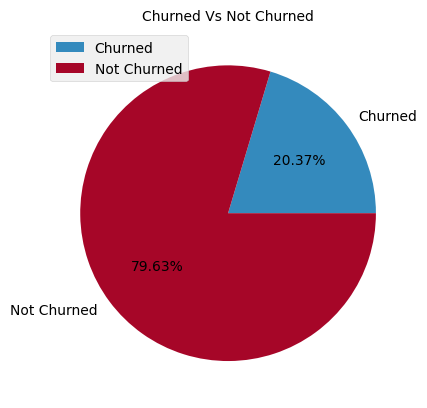

In [5]:
# PIE CHART: statistic with churn column

sizes = [df.churn[df['churn'] == 1].count(), df.churn[df['churn'] == 0].count()]

labels = ['Churned', 'Not Churned']

plt.pie(sizes, labels=labels, autopct='%.2f%%')

plt.legend(loc='upper left')
plt.title("Churned Vs Not Churned", size = 10)
plt.show()

# The number of sample with churn = 0 is four times the number of churn = 1 

<Axes: title={'center': 'credit_score'}, ylabel='Frequency'>

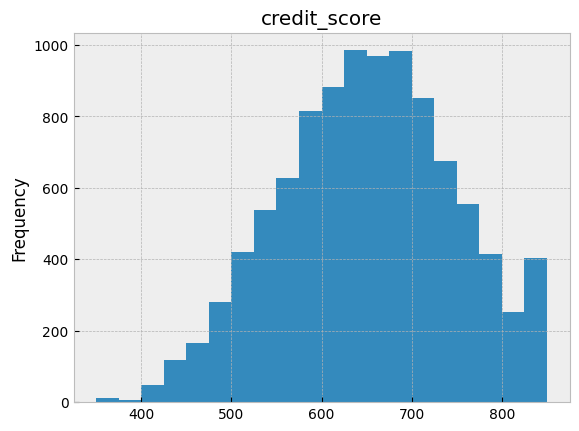

In [6]:
# draw distribution of credit score 
df['credit_score'].plot(kind='hist', bins=20, title='credit_score')

# draw historygram + bins = 20 -> the range of data: like how many sample in this range



In [26]:
# Which country is in this dataset ?

contries = list(df['country'].unique())

print(contries)

['France', 'Spain', 'Germany']


In [27]:
df['country'].value_counts()

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

<Axes: xlabel='country', ylabel='count'>

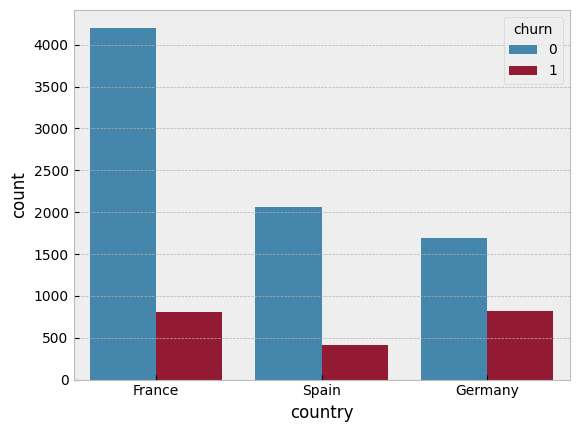

In [30]:
# count the churn in each country
sns.countplot(x = 'country', hue='churn', data=df)


<Axes: xlabel='count', ylabel='country'>

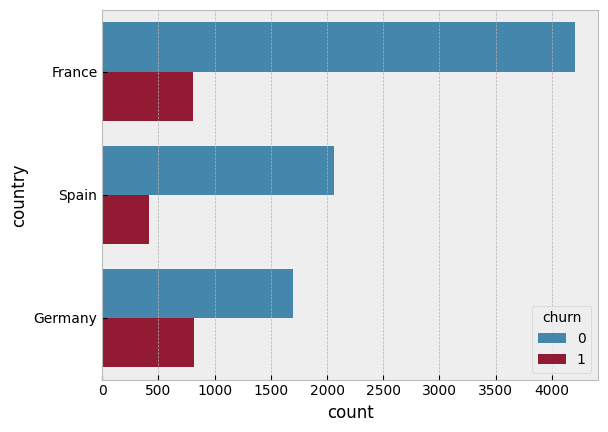

In [31]:

sns.countplot(y = 'country', hue='churn', data=df)


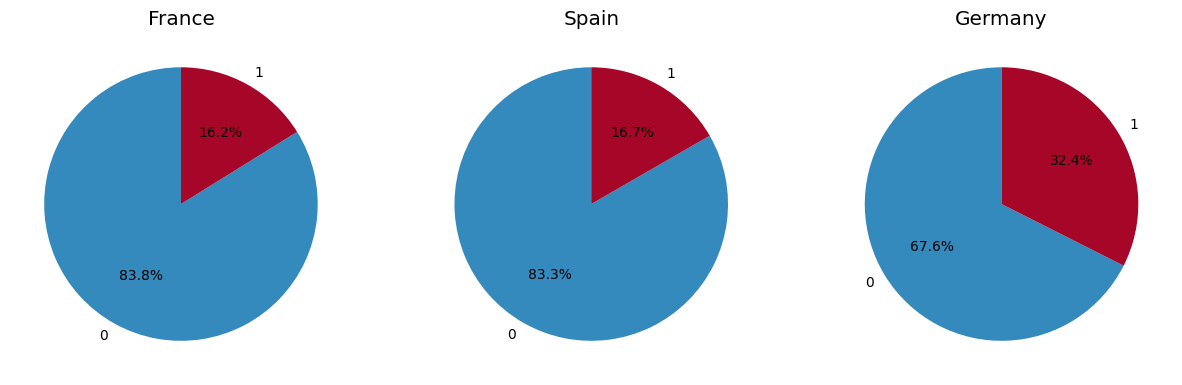

In [ ]:
# pie chart for each country

# make a row has 3 column to draw 3 pie chart
fig, axes = plt.subplots(1, len(contries), figsize=(15, 5))

for ax, country in zip(axes, contries):
    # filter df by country
    country_data = df[df['country'] == country]
    # count the churn values
    churn_counts = country_data['churn'].value_counts()

    # plot the pie chart
    ax.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{country}')

plt.show()


<Axes: xlabel='age', ylabel='Count'>

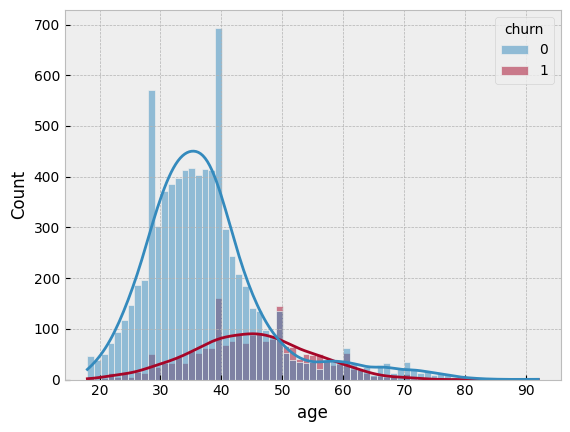

In [34]:
# draw age distribution graph
sns.histplot(data=df, x='age', hue='churn', kde=True)

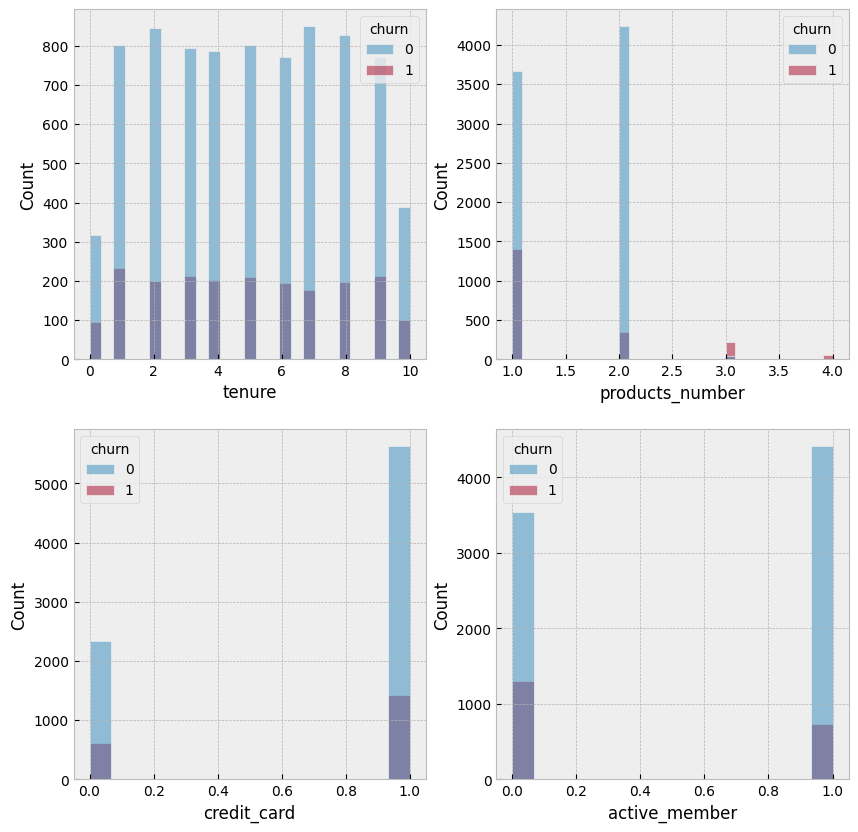

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axs = axs.flat

columns = ["tenure", "products_number", "credit_card", "active_member"]

for i in range(len(columns)):
    sns.histplot(data=df, x = columns[i], hue="churn", ax=axs[i])

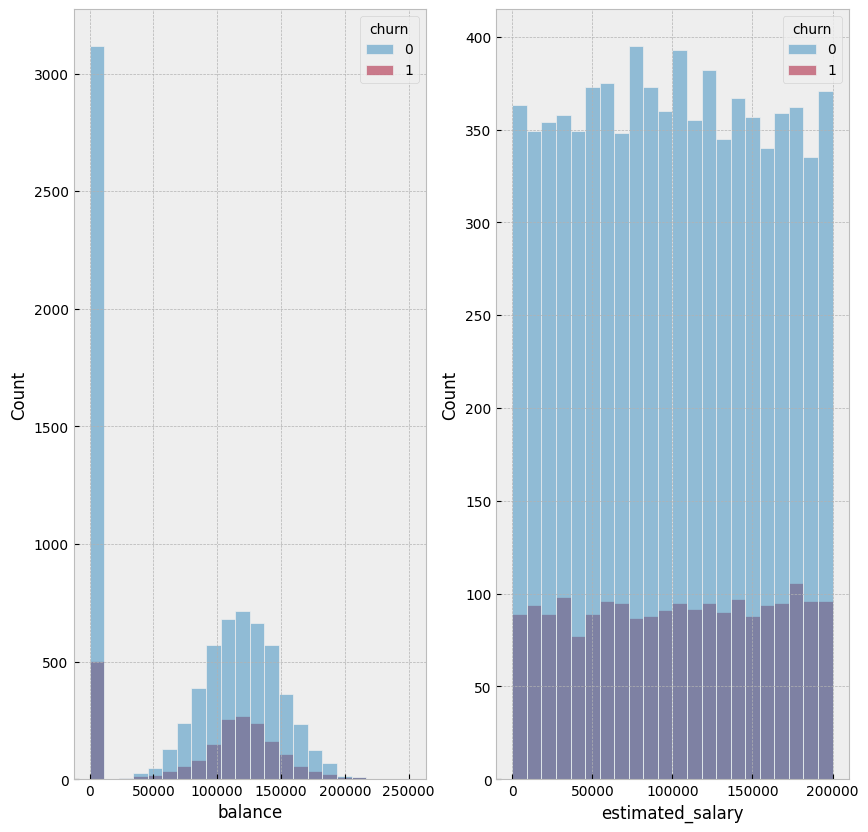

In [9]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
axs = axs.flat

columns = ["balance", "estimated_salary"]

for i in range(len(columns)):
    sns.histplot(data=df, x = columns[i], hue="churn", ax=axs[i])

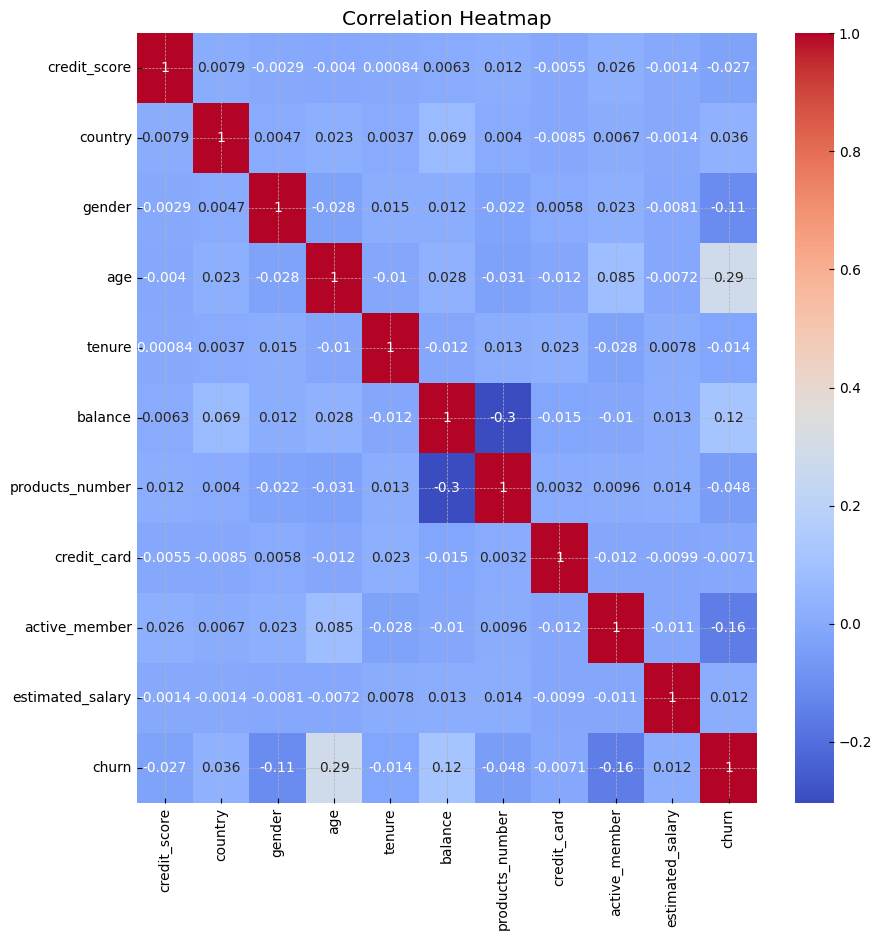

In [10]:
from sklearn.preprocessing import LabelEncoder

df['country'] = LabelEncoder().fit_transform(df['country'])
df['gender'] = LabelEncoder().fit_transform(df['gender'])

correlation_matrix = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

plt.title('Correlation Heatmap')

plt.show()


